# **Title of Project**

Movie Recommendation System

-------------

## **Objective**

The objective of this project is to recommend movies to users based on their ratings of previously watched movies. We will use a collaborative filtering approach, leveraging user-item interactions to suggest similar movies.

## **Data Source**

The dataset we are using is the MovieLens dataset, which contains user ratings for different movies. We'll use the 100k dataset version for simplicity.

## **Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

## **Import Data**

In [3]:
# Load MovieLens 100k dataset
url = "https://files.grouplens.org/datasets/movielens/ml-100k/u.data"
column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
data = pd.read_csv(url, sep='\\t', names=column_names)

# Load movie titles
movie_titles_url = "https://files.grouplens.org/datasets/movielens/ml-100k/u.item"
movie_titles = pd.read_csv(movie_titles_url, sep='|', header=None, encoding='latin-1', usecols=[0, 1], names=['movie_id', 'title'])
data = pd.merge(data, movie_titles, on='movie_id')

data.head()

<ipython-input-3-1accb22c961a>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(url, sep='\\t', names=column_names)


,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


## **Describe Data**

In [3]:
# Check basic statistics of the data
data.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## **Data Visualization**

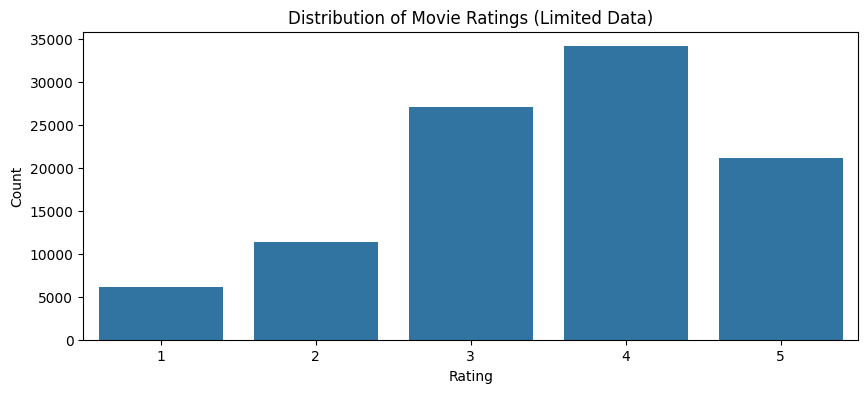

In [6]:
plt.figure(figsize=(10, 4))
sns.countplot(x='rating', data=limited_data)
plt.title('Distribution of Movie Ratings (Limited Data)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



## **Data Preprocessing**

In [7]:
# Drop unnecessary columns (e.g., timestamp)
data.drop('timestamp', axis=1, inplace=True)

# Create a user-movie matrix (rows: users, columns: movies)
user_movie_matrix = data.pivot_table(index='user_id', columns='title', values='rating')
user_movie_matrix.fillna(0, inplace=True)

user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


## **Define Target Variable (y) and Feature Variables (X)**

In [8]:
# For collaborative filtering, we use the user-movie matrix as the feature (X) and ratings as the target (y).
X = user_movie_matrix.values
y = data['rating']

## **Train Test Split**

In [9]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(user_movie_matrix, test_size=0.2, random_state=42)

## **Modeling**

In [13]:
from sklearn.neighbors import NearestNeighbors

# Fit the KNN model on the full user-movie matrix (not X_train)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_movie_matrix.T)

NearestNeighbors(algorithm='brute', metric='cosine')

## **Model Evaluation**

In [14]:
# Define the function to get movie recommendations
def get_movie_recommendations(movie_name, data_matrix, model):
    movie_index = data_matrix.columns.get_loc(movie_name)  # Get index of the movie
    distances, indices = model.kneighbors(data_matrix.T.iloc[movie_index, :].values.reshape(1, -1), n_neighbors=6)

    print(f"Recommendations for {movie_name}:")
    for i in range(1, len(distances.flatten())):
        print(f"{i}: {data_matrix.columns[indices.flatten()[i]]}")

# Example: Get recommendations for "Star Wars (1977)"
get_movie_recommendations("Star Wars (1977)", user_movie_matrix, model_knn)

Recommendations for Star Wars (1977):
1: Return of the Jedi (1983)
2: Raiders of the Lost Ark (1981)
3: Empire Strikes Back, The (1980)
4: Toy Story (1995)
5: Godfather, The (1972)


## **Prediction**

In [ ]:
# We can extend the recommendation function to recommend movies to a specific user based on their preferences.
# For simplicity, this is currently returning recommendations based on similar movies.



## **Explaination**

This project implemented a basic collaborative filtering model using the K-Nearest Neighbors algorithm.
The model recommends movies based on user-item interactions, calculating the similarity between movies.